# TASK 2 - Prediction Using Unsupervised ML (Data Science & Business Analytics Intern At TSF)

# BY - Anaya Mehta

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv(r'Iris.csv')

In [5]:
data.head(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
data.shape

(150, 6)

In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
data.drop("Id", axis=1, inplace = True)

In [14]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
data.tail(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Dividing the data into target and predictor variables and testing variables

In [17]:
target_data = data.iloc[:,4]
target_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [18]:
clustering_data = data.iloc[:,[0,1,2,3]]
clustering_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Determining the optimum number of clusters using the Elbow Method

In [21]:
#importing the necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\LALIT MEHTA\Documents\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


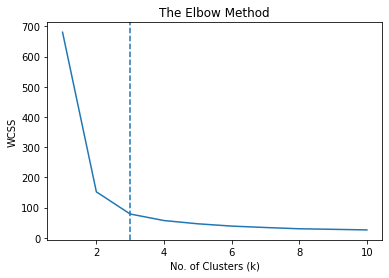

In [22]:
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)

#plotting the results
ax = plt.plot(range(1,11),wcss)
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method')
plt.show()

In [23]:
km = KMeans(n_clusters=3, init='k-means++',random_state = 0)
km.fit(clustering_data)

KMeans(n_clusters=3, random_state=0)

In [24]:
cls = clustering_data.copy()
cls['Cluster_Prediction'] = km.fit_predict(clustering_data)
cls.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Now that all the data is ready, we just need to plot all the 3 clusters using scatter plot

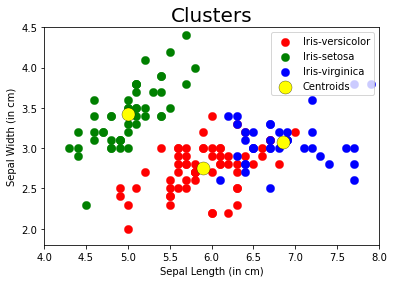

In [29]:
plt.scatter(x=cls[cls['Cluster_Prediction'] == 0]['SepalLengthCm'],
            y=cls[cls['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70,edgecolor='red', linewidth=0.3, c='red', label='Iris-versicolor')


plt.scatter(x=cls[cls['Cluster_Prediction'] == 1]['SepalLengthCm'],
            y=cls[cls['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70,edgecolor='green', linewidth=0.3, c='green', label='Iris-setosa')


plt.scatter(x=cls[cls['Cluster_Prediction'] == 2]['SepalLengthCm'],
            y=cls[cls['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70,edgecolor='blue', linewidth=0.3, c='blue', label='Iris-virginica')

plt.scatter(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
plt.ylabel('Sepal Width (in cm)')
plt.xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()